In [8]:
import torch
from matplotlib import pyplot as plt
from matplotlib import rc
import numpy as np

rc("font", **{"family": "Times"})
rc("text", usetex=True)
# plt.rcParams['figure.dpi']= 300
plt.rcParams['figure.dpi']= 150

x = torch.load("pr_rcp85_land-cpm_birmingham-64_2.2km-coarsened-4x-2.2km-coarsened-4x_01_1hr_flattened_sorted.pt").numpy()
y = torch.load("samples.pt", map_location=torch.device('cpu')).numpy().flatten()

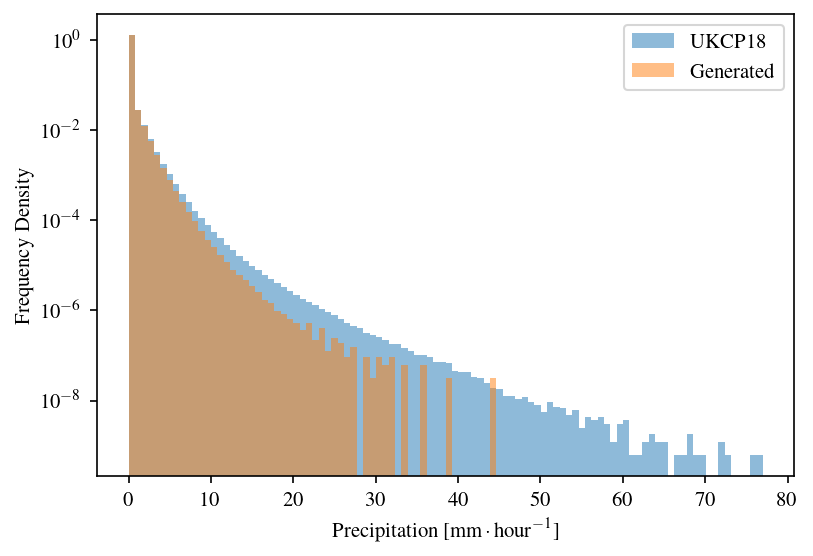

In [9]:
plt.figure(figsize=(6, 4))
plt.hist(x, alpha = 0.5, label = "UKCP18", density = True, range = (0, x[-1]), bins = 100)
plt.hist(y, alpha = 0.5, label = "Generated", density = True, range = (0, x[-1]), bins = 100)
plt.yscale("log")
plt.xlabel('Precipitation [$\mathrm{mm}\cdot\mathrm{hour}^{-1}$]')
plt.ylabel('Frequency Density')
plt.legend()
plt.show()